# Lecture 20 - Non-Linear Dimensionality Reduction with Manifold Learning

# Manifold Learning (Non-Linear Dimensionality Reduction)

As we have already noted, many natural sources of data correspond to low-dimensional, possibly noisy, non-linear manifolds embedded within the higher dimensional observed data space.Capturing this property explicitly can lead to improved density modeling compared with more general methods.

PCA and LDA are often used to project a data set onto a lower-dimensional space. However both of them assume that the data samples live in an underlying linear manifold.

There are other dimensionality reduction techniques that do not assume the manifold is linear. They include:
1. Multi-Dimensional Scaling (MDS)
2. Isometric Mapping (ISOMAP)
3. Locally Linear Embedding (LLE)
4. t-Distributed Stochastic Neighbor Embedding (t-SNE)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

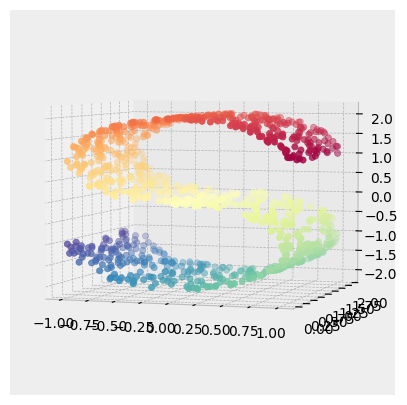

In [2]:
from sklearn.datasets import make_s_curve

n_points = 1000
X_scurve, color = make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig=plt.figure(figsize=(15, 5))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(X_scurve[:, 0], X_scurve[:, 1], X_scurve[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

Here is the **simplest possible explanation** of
**MDS, ISOMAP, LLE, and t-SNE** — with intuition only, no math, and baby-level examples.

---

# 🌈 **First: What are these?**

All four are **manifold learning / nonlinear dimensionality reduction** algorithms.
They take **high-dimensional data** and make it **lower-dimensional (usually 2D)** while keeping the *shape* of the data.

You can think of them as **ways to make a map** of complicated data.

---

# 🌍 1) **MDS — Multi-Dimensional Scaling**

### **Simple Meaning**

👉 “Place the points in 2D so that the distances between them stay the same.”

### **Analogy**

You know the distances between cities (Delhi–Mumbai, Mumbai–Chennai).
MDS creates a *map* that keeps those distances consistent.

### **Works Well For**

* Data where distances matter
* Global structure

### **Weakness**

* Doesn’t understand curved manifolds
* Only uses distances → not local structure

---

# 🛣 2) **ISOMAP**

### **Simple Meaning**

👉 “Like MDS, but uses *road distances* instead of straight-line distances.”

### **Analogy**

Imagine a mountain.
Two towns on opposite sides are **close in straight line**, but **far by road**.

ISOMAP uses **road distance** (geodesic distance), not straight distance.

### **Why?**

Because data may lie on a curved surface → straight distance is misleading.

### **Works Well For**

* Curved shapes (Swiss roll)
* Nonlinear data

### **Weakness**

* Breaks if distances between far points are wrong
* Sensitive to number of neighbors

---

# 🧩 3) **LLE — Locally Linear Embedding**

### **Simple Meaning**

👉 “Every point can be reconstructed from its closest neighbors; keep that relationship in the low-dimensional space.”

### **Analogy**

Imagine each point has 5 friends.
Your position is defined by your friends’ positions.

LLE says:

> If you keep friend relationships the same, you keep the shape of the manifold.

### **What It Preserves**

* Local structure (small neighborhoods)
* Curved surfaces

### **Weakness**

* Doesn’t preserve global shape
* Can produce weird holes or distortions

---

# 🎨 4) **t-SNE**

### **Simple Meaning**

👉 “Make similar points stay very close, and push very different points far apart.”

### **Analogy**

Imagine compressing a crowd:

* Close friends stay together
* Strangers get pushed away
  This creates clear **clusters**.

### **Why People Love t-SNE**

* Beautiful visualizations
* Perfect for clustering
* Works incredibly well with images, embeddings, etc.

### **Weakness**

* Cannot preserve global structure
* Plots can look random if parameters are wrong
* You cannot use it for downstream ML (only visualization)

---

# 🎯 **Summary Table (Super Easy)**

| Method     | What it preserves        | Intuition                       | Good for                     |
| ---------- | ------------------------ | ------------------------------- | ---------------------------- |
| **MDS**    | Distances                | Make a map by keeping distances | Simple global structures     |
| **ISOMAP** | Road distance (geodesic) | Map curved surfaces             | Manifolds (Swiss roll)       |
| **LLE**    | Local neighborhoods      | Keep friend relations           | Local structure, curved data |
| **t-SNE**  | Clusters                 | Make similar points very close  | Visualization of clusters    |

---

# 🍼 **Baby-Level Summary**

* **MDS:** Keep distances same
* **ISOMAP:** Keep *road* distances same
* **LLE:** Keep neighborhoods same
* **t-SNE:** Make clusters look clean and separated

---

If you want, I can also explain:
👉 PCA vs MDS vs ISOMAP vs LLE vs t-SNE (very simple)
👉 Which one to use in which situation
👉 Visual demo with Swiss roll or digits dataset

Just tell me!


---

# Multi-Dimensional Scaling (MDS)

Another linear technique with a similar aim is **multidimensional scaling**, or **MDS**. It finds a low-dimensional projection of the data such as to **preserve the pairwise distances between data points**, and involves finding the eigenvectors of the distance matrix. 

Consider a set of mean-centered observations $X=\{x_1,x_2,\dots,x_N\}$ where $x_i\in\mathbb{R}^D$. By mean-centered samples $X$, I mean that $\mu_j = \sum_{i=1}^N x_{ij} = 0, \forall j=1,2,\dots,D$.

Consider the **proximity matrix** $D$ that stores pairwise distances of data points $d_{ij} = \text{distance}(x_i,x_j)$:

\begin{align*}
D = \left[\begin{array}{cccc}
d_{11} & d_{12} & \cdots & d_{1N}\\
d_{21} & d_{22} & \cdots & d_{2N}\\
\vdots & \vdots & \ddots & \vdots\\
d_{N1} & d_{N2} & \cdots & d_{NN}
\end{array}\right]
\end{align*}

Note that $D$ is an $N\times N$ symmetric matrix.

Given an assumed Euclidean proximity matrix, $D$, the **goal** of MDS is to find a set of points, $Y$, that have the same proximity matrix in an M-dimensional space, where $M<D$.

* MDS preserves the global data structure.

* MDS can use any distance metric to compute the pairwise distances between points.

* There is the need to store the proximity matrix (half of it, since it is symmetric). Thus requiring a significant computational and storage resources for large datasets. 
    * There are $N(N-1)/2$ distance computations, where $N$ is the number of samples.

* **Classical MDS** refers to MDS when using Euclidean distances.

* In the case where the pairwise distances are computed with the Euclidean distance metric, MDS gives equivalent results to PCA. Therefore, MDS is a generalization of PCA.

--------------
euclidean proximity
It is a table of distances between every pair of points,
where the distance is Euclidean distance (the normal straight-line distance).

That's it.

-------------


## Deciding Number of Dimensions

Interpretability of the MDS solution is often important, and lower dimensional solutions will typically be easier to interpret and visualize. However, dimension selection is also an issue of balancing underfitting and overfitting. Lower dimensional solutions may underfit by leaving out important dimensions of the dissimilarity data. Higher dimensional solutions may overfit to noise in the dissimilarity measurements. 

* How would you decide on the number of dimensions?

Model selection tools like cross-validation on the subsequent module in the pipeline (e.g. classification) can thus be useful to select the dimensionality that balances underfitting and overfitting.

## Test the Results for Reliability and Validity

Compute R-squared to determine what proportion of variance of the scaled data can be accounted for by the MDS procedure. An R-square of 0.6 is considered the minimum acceptable level. An R-square of 0.8 is considered good for metric scaling and .9 is considered good for non-metric scaling.

In practice, there are other algorithms other than eigendecomposition that can be used to find MDS solutions. This can be viewed as a tunable parameter as well.

In [3]:
from sklearn.manifold import MDS

MDS?

Init signature:
MDS(
    n_components=2,
    *,
    metric=True,
    n_init=4,
    max_iter=300,
    verbose=0,
    eps=0.001,
    n_jobs=None,
    random_state=None,
    dissimilarity='euclidean',
    normalized_stress='auto',
)
Docstring:     
Multidimensional scaling.

Read more in the :ref:`User Guide <multidimensional_scaling>`.

Parameters
----------
n_components : int, default=2
    Number of dimensions in which to immerse the dissimilarities.

metric : bool, default=True
    If ``True``, perform metric MDS; otherwise, perform nonmetric MDS.
    When ``False`` (i.e. non-metric MDS), dissimilarities with 0 are considered as
    missing values.

n_init : int, default=4
    Number of times the SMACOF algorithm will be run with different
    initializations. The final results will be the best output of the runs,
    determined by the run with the smallest final stress.

max_iter : int, default=300
    Maximum number of iterations of the SMACOF algorithm for a single run.

verbose : 

In [4]:
mds = MDS(n_components=2, dissimilarity='euclidean')

Y = mds.fit_transform(X_scurve)

Y.shape

(1000, 2)

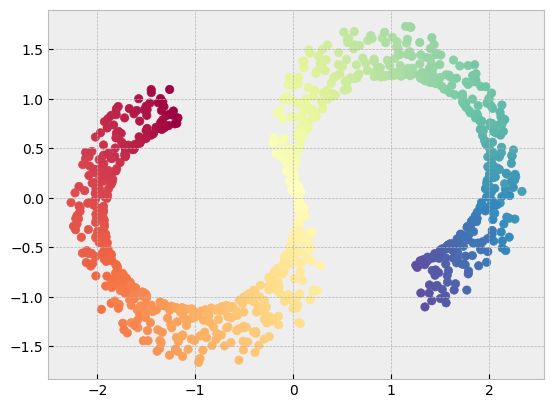

In [5]:
plt.scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral);

## Application Example

The data produced by laser range scanning systems is typically a rectangular grid of distances from the sensor to the object being scanned. If the sensor and object are fixed, only objects that are "point viewable" can be fully digitized. More sophisticated systems are capable of digitizing objects by rotating either the sensor or the object. 

* However, the scanning of topologically more complex objects (those with "holes") cannot be accomplished by either of these methods. To adequately scan these objects, multiple view points must be used. Merging the data generated from multiple view points to reconstruct a polyhedral surface representation is a non-trivial task.

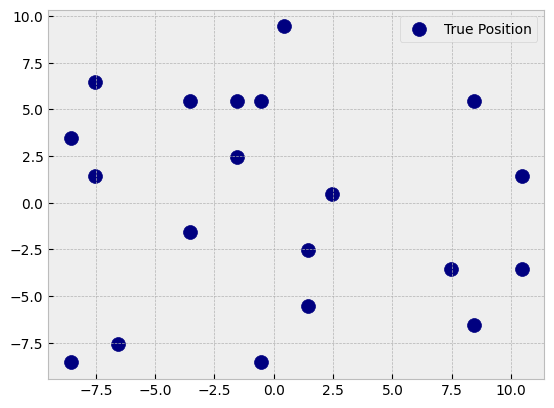

In [6]:
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, label='True Position')
plt.legend();

In [7]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist

# Distances between pairs of points
distances = squareform(pdist(X_true, metric='euclidean'))

# Corrupting distance by adding additive Uniform(0,1) noise
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
# ensuring no noise is added to the diagonal of the distance matrix
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
distances += noise

distances.shape

(20, 20)

In [8]:
mds = MDS(n_components=2, 
          dissimilarity='precomputed', 
          random_state=seed,
         normalized_stress='auto')

Y_mds = mds.fit(distances).embedding_

In [9]:
# Rotate the data
pca = PCA(n_components=2)
X_true = pca.fit_transform(X_true)

Y_mds = pca.fit_transform(Y_mds)

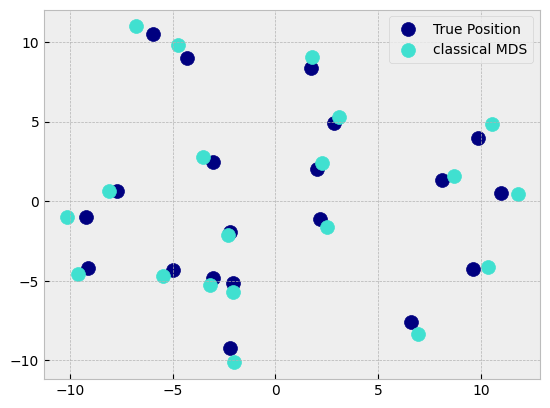

In [10]:
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, label='True Position')
plt.scatter(Y_mds[:, 0], Y_mds[:, 1], color='turquoise', s=s, label='classical MDS')
plt.legend(scatterpoints=1, loc="best", shadow=False);

In [11]:
from sklearn.metrics import r2_score

r2_score(X_true, Y_mds)

0.9923934390812481

---

# Isometric feature Mapping (ISOMAP)

In **Isometric feature Mapping**, or **ISOMAP**, the goal is to project the data to a lower-dimensional space using MDS, but where the distance/dissimilarities are defined in terms of the **geodesic distances** measured along the manifold.

ISOMAP was introduced in 2000 in a [Science](https://science.sciencemag.org/content/290/5500/2319/tab-pdf) issue paper and approaches dimensionality reduction for data that lies on a manifold.

* It builds on MDS by using a specific distance: geodesic distances.

* The contribution of ISOMAP is that the proximity matrix, $D$, is constructed using **geodesic distances**.

## Steps for Implementing MDS

1. **Construct neighborhood graph:** Identify the neighbors of each point on the manifold (e.g., K nearest neighbors, $\epsilon$-ball approach). The edges between neighbors are weighted using their distance in the input space.

2. **Compute shortest paths:** Compute the distance between all pairs of points on the manifold by computing their shortest path distance on the graph created in step 1 (e.g. Floyd-Warshall's algorithm). This will produce the distance matrix $D_G$.


Floys-warshall's algorithm is an algorithm that finds the shortest distance between every pair of nodes in a graph.

Not just one pair.
All pairs.

It gives you a distance table telling:

shortest A → B

shortest A → C

shortest B → D

every possible pair



3. **Construct M-dimensional embedding:** Apply MDS to the matrix of graph distances computed in step 2.

### Floyd-Warshall Algorithm

The Foyd-Warshall alorithm to compute graph-based distance:

1. Initialize $d_G(i,j) = d_X(i,j)$ if $i,j$ are identified as neighbors. Otherwise, set $d_G(i,j) = \infty$.
    * This means that, if data points are considered neighbors of a particular point, then Euclidean distance between that point and its neighbors is sufficient and assumed to be close enough to the geodesic distance. (Note that this is true for a reasonably small number of neighbors.)

2. For each value $k=1,2,\dots,N$, replace all entries of $d_G(i,j)$ by $\min\left(d_G(i,j),d_G(i,k)+d_G(k,j)\right)$. 

The matrix of final values $D_G=\{d_G(i,j)\}$ will contain the **shortest path distances** between all pairs of points in $G$.

## Shortcomings of ISOMAP

If the data matrix $X\in\mathbb{R}^{N\times D}$ is sufficiently dense, then graph shortest path distance will approximate closely the original geodesic distance.

* ISOMAP may suffer from *non-convexity* such as holes on manifols.

* We need to compute pairwise shortest distance path between **all** sample pairs $(i,j)$. This matrix is a global matrix, non-sparse and it requires cubic complexity $O(N^3)$.

In [12]:
from IPython.display import Image
Image('figures/isomap.png', width=900)

FileNotFoundError: No such file or directory: 'figures/isomap.png'

FileNotFoundError: No such file or directory: 'figures/isomap.png'

<IPython.core.display.Image object>

In [13]:
from sklearn.manifold import Isomap

Isomap?

Init signature:
Isomap(
    *,
    n_neighbors=5,
    radius=None,
    n_components=2,
    eigen_solver='auto',
    tol=0,
    max_iter=None,
    path_method='auto',
    neighbors_algorithm='auto',
    n_jobs=None,
    metric='minkowski',
    p=2,
    metric_params=None,
)
Docstring:     
Isomap Embedding.

Non-linear dimensionality reduction through Isometric Mapping

Read more in the :ref:`User Guide <isomap>`.

Parameters
----------
n_neighbors : int or None, default=5
    Number of neighbors to consider for each point. If `n_neighbors` is an int,
    then `radius` must be `None`.

radius : float or None, default=None
    Limiting distance of neighbors to return. If `radius` is a float,
    then `n_neighbors` must be set to `None`.

    .. versionadded:: 1.1

n_components : int, default=2
    Number of coordinates for the manifold.

eigen_solver : {'auto', 'arpack', 'dense'}, default='auto'
    'auto' : Attempt to choose the most efficient solver
    for the given problem.

    'arp

In [14]:
isomap = Isomap(n_components=2, n_neighbors=6)
Y_isomap = isomap.fit_transform(X_true)

# Rotate the data
pca = PCA(n_components=2)
X_true = pca.fit_transform(X_true)

Y_isomap = pca.fit_transform(Y_isomap)

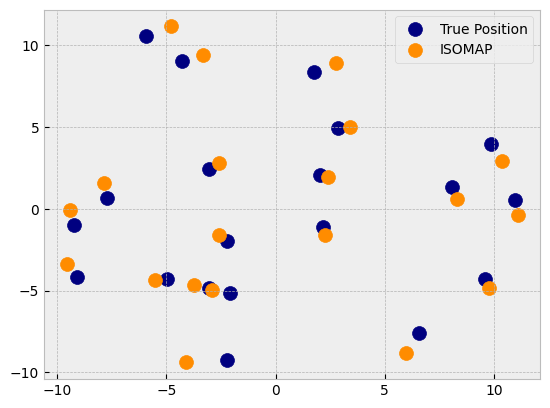

In [15]:
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, label='True Position')
plt.scatter(Y_isomap[:, 0], Y_isomap[:, 1], color='darkorange', s=s, label='ISOMAP')
plt.legend(scatterpoints=1, loc="best", shadow=False);

In [16]:
r2_score(X_true, Y_isomap)

0.9863031587621671

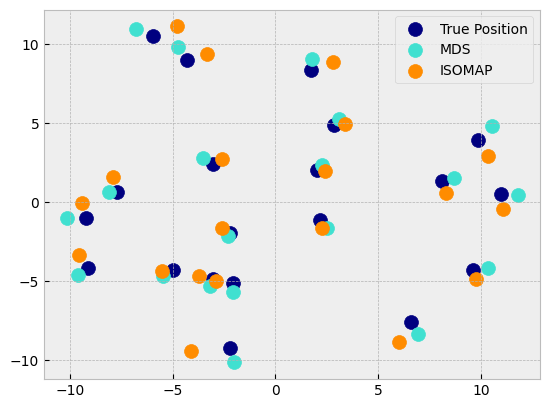

In [17]:
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, label='True Position')
plt.scatter(Y_mds[:, 0], Y_mds[:, 1], color='turquoise', s=s, label='MDS')
plt.scatter(Y_isomap[:, 0], Y_isomap[:, 1], color='darkorange', s=s, label='ISOMAP')
plt.legend(scatterpoints=1, loc="best", shadow=False);

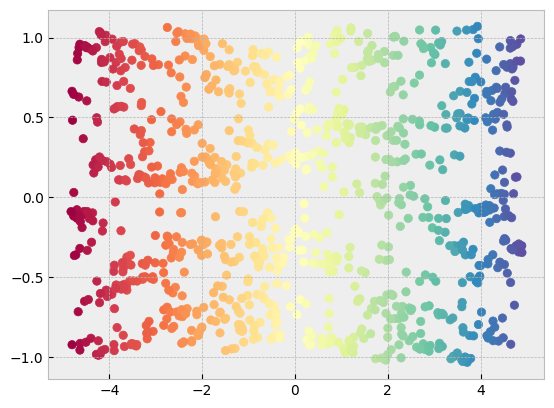

In [18]:
# S-curve manifold learning with ISOMAP

isomap = Isomap(n_components=2, n_neighbors=10)

Y = isomap.fit_transform(X_scurve)

plt.scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral);

---

# Locally Linear Embedding (LLE)

**Locally linear embedding**, or **LLE** first computes the set of coefficients that best reconstructs each data point from its neighbors. These coefficients are arranged to be invariant to rotations, translations, and scalings of that data point and its neighbors, and hence they characterize the local geometrical properties of the neighborhood.

* LLE was also introduced in 2000 in the same [Science](https://science.sciencemag.org/content/290/5500/2323/tab-pdf) issue as ISOMAP.

* The intuition behind LLE is that each data point and its close neighbors lie on or close to a *locally linear* patch of the manifold.
    * We can characterize the local geometry of these patches by linear coefficients that reconstruct each data point from its neighbors.

* Each point can be written as a linear combination of its neighbors. 

* The lower-dimensional projection will be a combination of locally linear patches.

Informally, imagine taking a pair of scissors, cutting out locally linear patches of the underlying manifold, and placing them in the low dimensional embedding space. Assume further that this operation is done in a way that preserves the angles formed by each data point to its nearest neighbors. In this case, the transplantation of each patch involves no more than a translation, rotation, and rescaling of its data, exactly the operations to which the weights are invariant. Thus, when the patch arrives at its low dimensional destination, we expect the same weights to reconstruct each data point from its neighbors.

## Steps to Implement LLE

1. **Construct neighborhood graph:** Identify the neighbors of each point on the manifold (e.g., K nearest neighbors, $\epsilon$-ball approach). The edges between neighbors are weighted using their distance in the input space.

2. **Find a set of weights $W\in\mathbb{R}^{D\times K}$ such that each point $x_i\in\mathbb{R}^{D\times 1}$ can be reconstructed by its $K$ neighbors.**

$$x_i = \sum_{j=1}^K w_{ij}x_{i(j)}$$

where $x_{i(j)}$ is the $j$-th neighbor of $x_i$.

The reconstruction errors are measured by the cost function:

$$\epsilon(W) = \sum_{i=1}^N \left\Vert x_i - \sum_{j=1}^K w_{ij}x_{i(j)} \right\Vert_2^2$$

which adds up the squared distances between all the data points and their reconstructions. The weights $w_{ij}$ summarize the contribution of the $j$-th data point to the $i$-th reconstruction. To compute the weights $w_{ij}$, we minimize the
cost function $\epsilon(W)$ subject to two constraints:

*Contraint 1:* Each data point $x_i$ is reconstructed only from its neighbors, enforcing $w_{ij} = 0$ if $x_j$ is not a neighbor of $x_i$.

*Constraint 2:* The rows of the weight matrix sum to one: $\sum_{j=1}^K w_{ij} = 1$. The optimal weights subject to these constraints are found by solving a least-squares problem.

3. **Each high-dimensional observation $x_i\in\mathbb{R}^{D\times 1}$ is mapped to a low-dimensional vector $x_i\in\mathbb{R}^{M\times 1}$ representing global internal coordinates on the manifold.** This is done by choosing $M$-dimensional coordinates $y_i$ to minimize the embedding cost function:

$$\Phi(Y) = \sum_{i=1}^N \left\Vert y_i - \sum_{j=1}^K w_{ij}y_j \right\Vert_2^2$$

with fixed weights $W$. To compute the projection $Y$, we minimize the cost function $\Phi(Y)$ subject to two constraints:

*Contraint 1:* The coordinates are centered on the origin: $\sum_{i=1}^N y_i = 0$

*Contraint 2:* Also, to avoid degenerate solutions, we constrain the embedding vectors to have unit covariance, with outer products that satisfy $\frac{1}{N}YY^T = I$

* More details on the mathematical derivations can be found in the original published work ([here](https://science.sciencemag.org/content/290/5500/2323/tab-pdf)).

In [19]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

LLE?

Init signature:
LLE(
    *,
    n_neighbors=5,
    n_components=2,
    reg=0.001,
    eigen_solver='auto',
    tol=1e-06,
    max_iter=100,
    method='standard',
    hessian_tol=0.0001,
    modified_tol=1e-12,
    neighbors_algorithm='auto',
    random_state=None,
    n_jobs=None,
)
Docstring:     
Locally Linear Embedding.

Read more in the :ref:`User Guide <locally_linear_embedding>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to consider for each point.

n_components : int, default=2
    Number of coordinates for the manifold.

reg : float, default=1e-3
    Regularization constant, multiplies the trace of the local covariance
    matrix of the distances.

eigen_solver : {'auto', 'arpack', 'dense'}, default='auto'
    The solver used to compute the eigenvectors. The available options are:

    - `'auto'` : algorithm will attempt to choose the best method for input
      data.
    - `'arpack'` : use arnoldi iteration in shift-invert mode. For this
   

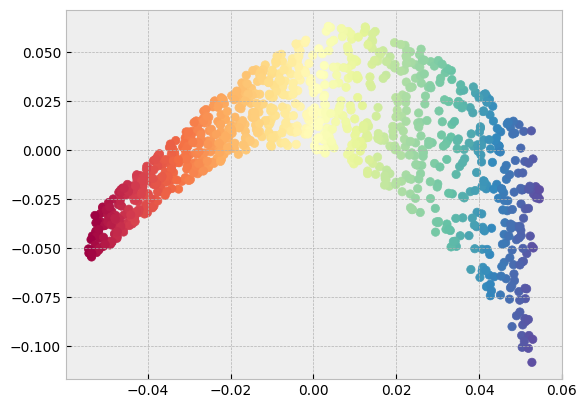

In [20]:
# S-curve manifold learning with ISOMAP
# K nearest neighbors approachfor defining neighborhood
lle = LLE(n_components=2, n_neighbors=10)

Y = lle.fit_transform(X_scurve)

plt.scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral);

---

# t-Distributed Stochastic Neighbor Embedding (t-SNE) - tee-snee

Stochastic Neighbor Embedding (SNE) starts by converting the high-dimensional Euclidean distances between data points into conditional probabilities that represent similarities. The similarity of data point $x_j$ to data point $x_i$ is the conditional probability, $p_{j|i}$, that $x_i$ would pick $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $x_i$.

For nearby data points, $p_{j|i}$ is relatively high, whereas for widely separated data points, $p_{j|i}$ will be
almost infinitesimal (for reasonable values of the variance of the Gaussian, $\sigma_i$). Mathematically, the conditional probability $p_{j|i}$ is given by

\begin{align*}
p_{j|i} = \frac{\exp(-\Vert x_i-x_j\Vert^2 / 2\sigma_i^2)}{\sum_{k\neq i} \exp(-\Vert x_i-x_k\Vert^2 / 2\sigma_i^2)}
\end{align*}

where $\sigma_i$ is the variance of the Gaussian that is centered on data point $x_i$. Because we are only interested in modeling pairwise similarities, we set the value of $p_{i|i}$ to zero. For the low-dimensional counterparts $y_i$ and $y_j$ of the high-dimensional data points $x_i$ and $x_j$, it is possible to compute a similar conditional probability, which we denote by $q_{j|i}$ . 

We set the variance of the Gaussian that is employed in the computation of the conditional probabilities $q_{j|i}$
to $\frac{1}{\sqrt{2}}$. (Note that setting the variance in the low-dimensional Gaussians to another value only results in a rescaled version of the final.) Hence, we model the similarity of map point $y_j$ to map point $y_i$:

\begin{align*}
q_{j|i} = \frac{\exp(-\Vert y_i-y_j\Vert^2)}{\sum_{k\neq i} \exp(-\Vert y_i-y_k\Vert^2 )}
\end{align*}

Again, since we are only interested in modeling pairwise similarities, we set $q_{i|i} = 0$.

If the map points $y_i$ and $y_j$ correctly model the similarity between the high-dimensional data points $x_i$ and $x_j$, the conditional probabilities $p_{j|i}$ and $q_{j|i}$ will be equal. Motivated by this observation, SNE aims to find a low-dimensional data representation that minimizes the mismatch between
$p_{j|i}$ and $q_{j|i}$. 

A natural measure of the faithfulness with which $q_{j|i}$ models $p_{j|i}$ is the **Kullback-Leibler (KL) divergence** (which is in this case equal to the cross-entropy up to an additive constant). **SNE minimizes the sum of Kullback-Leibler divergences over all data points** using a **gradient descent** method. The objective function is as follows:

\begin{align*}
J(y) = \sum_i \text{KL}(P_i \parallel Q_i) = \sum_i\sum_j p_{j|i} \log\frac{p_{j|i}}{q_{j|i}}
\end{align*}

in which $P_i$ represents the conditional probability distribution over all other data points given data point $x_i$, and $Q_i$ represents the conditional probability distribution over all other map points given map point $y_i$. Because the Kullback-Leibler (KL) divergence is not symmetric, different types of error in the pairwise distances in the low-dimensional map are not weighted equally. In particular, there is a large cost for using widely separated map points to represent nearby data points (i.e., for using a small $q_{j|i}$ to model a large $p_{j|i})$, but there is only a small cost for using nearby map points to represent widely separated data points. 

This small cost comes from wasting some of the probability mass in the relevant $Q$ distributions. In other words, the SNE cost function focuses on retaining the local structure of the data in the map (for reasonable values of the variance of the Gaussian in the high-dimensional space, $\sigma_i$).

The remaining parameter to be selected is the variance $\sigma_i$ of the Gaussian that is centered over each high-dimensional data point, $x_i$. It is not likely that there is a single value of $\sigma_i$ that is optimal for all data points in the data set because the density of the data is likely to vary. In dense regions, a smaller value of $\sigma_i$ is usually more appropriate than in sparser regions. Any particular value of $\sigma_i$ induces a probability distribution, $P_i$, over all of the other data points. This distribution has an entropy which increases as $\sigma_i$ increases. SNE performs a binary search for the value of $\sigma_i$ that produces a $P_i$ with a **fixed perplexity** that is specified by the user.

The perplexity is defined as

\begin{align*}
\text{Perp}(P_i) = 2^{H(P_i)}
\end{align*}

where $H(P_i)$ is the **Shannon entropy** of $P_i$ measured in bits

\begin{align*}
H(P_i) = - \sum_j p_{j|i} \log_2(p_{j|i})
\end{align*}

The perplexity can be interpreted as a smooth measure of the effective number of neighbors. The performance of SNE is fairly robust to changes in the perplexity, and **typical values are between 5 and 50**.

The minimization of the objective function is performed using a gradient descent method. The gradient has a surprisingly simple form

\begin{align*}
\frac{\partial J}{\partial y_i} = 2 \sum_j \left(p_{j|i} - q_{j|i} + p_{i|j} - q_{i|j}\right)(y_i-y_j)
\end{align*}

Here is **t-SNE explained in super easy, baby-level language** using the picture you gave.

---

# 🌈 **t-SNE in Easy Language**

Imagine you have **many high-dimensional data points** (each point has many features, like 100 or 500 numbers).
We want to **draw them nicely in 2D** so we can visualize clusters.

But simply plotting them will not work because 100-D → 2-D loses information.

So t-SNE uses the idea:

> **“If two points are close in high-dimensional space, keep them close in the 2-D plot.”
> If they are far, keep them far.”**

---

# ⭐ Step-by-Step SUPER SIMPLE Explanation

## **1️⃣ Think of each point as a person looking for neighbors**

For each point (x_i):

* Look at all other points (x_j)
* If (x_j) is **close**, probability is **high**
* If (x_j) is **far**, probability is **very small**

This probability is:

[
p_{j|i} = \frac{\exp\left(-|x_i - x_j|^2 / 2\sigma_i^2\right)}{\sum_{k \ne i} \exp\left(-|x_i - x_k|^2 / 2\sigma_i^2\right)}
]

💡 **This just means:**
“Points near me should look very likely to be my neighbors. Far points should look unlikely.”

---

## **2️⃣ σᵢ (sigma) controls how many neighbors we consider**

* A **big σ** = everyone looks close
* A **small σ** = only very close neighbors matter

(Perplexity controls this.)

---

## **3️⃣ In the 2D map (yᵢ and yⱼ), we do the same thing**

We compute another probability:

[
q_{j|i} = \frac{\exp(-|y_i - y_j|^2)}{\sum_{k \ne i} \exp(-|y_i - y_k|^2)}
]

💡 This is the **2D neighborhood probability**.

---

## **4️⃣ Goal: Make p’s and q’s look the same**

t-SNE tries to place the 2D points (y_i) so that:

* If two points were close in high-D, they stay close in 2-D
* If far in high-D, they remain far in 2-D

Mathematically:

> “Make (q_{j|i}) (2D similarity) look like (p_{j|i}) (high-D similarity).”

It does this by minimizing a loss function (KL divergence).

---

# 🌟 **EASIEST SUMMARY (1–liner)**

**High-dimensional nearby points → keep them close.
High-dimensional far points → push them far.**

This creates beautiful clusters.

---

# 🌈 **Super Simple Analogy**

Imagine a class of students standing in a large field (100-D):

* Students close to each other = friends
* Students far apart = not friends

You want to make a **2D seating plan** (like a bench) where:

* Friends sit close
* Non-friends sit far

t-SNE looks at friendships (probabilities) and arranges the seats.

---

If you want, I can also explain:

✅ What perplexity is
✅ Why t-SNE creates clusters
✅ How it compares to PCA, LLE, Isomap
— all in easy language.


🌟 KL Divergence in Super Easy Language

KL Divergence answers one question:

👉 “How different are two probability distributions?”

Or even simpler:

👉 “How surprised am I if I think the world works like A,

but the real world actually works like B?”

If A and B are the same → KL = 0 (no surprise)

If A and B are different → KL is large (big surprise)


Here is the **easiest possible explanation** of the continuation you posted.
No maths, no fancy terms — **just what it means in real life**.

---

# 🌈 **1️⃣ What is the big idea here?**

t-SNE wants the **2D map** to behave **exactly like** the high-dimensional world:

* If two points were close → keep them close in 2D
* If two points were far → keep them far in 2D

To check “how well” the 2D map is doing this matching, t-SNE uses **KL Divergence**.

---

# ⭐ 2️⃣ KL Divergence (super easy meaning)

KL Divergence =
**“How different are the two probability distributions?”**

Here:

* (p_{j|i}) = probability that (x_j) is neighbor of (x_i) in high-D
* (q_{j|i}) = probability that (y_j) is neighbor of (y_i) in 2-D

If they match perfectly → KL = 0
If they don’t match → KL gets bigger

So the goal:

### 🧠 **Make q look like p as much as possible.**

---

# ⭐ 3️⃣ The cost function J(y)

This is just:

> “Add up ALL KL divergences for ALL points”

[
J(y)=\sum_i \sum_j p_{j|i} \log \frac{p_{j|i}}{q_{j|i}}
]

💡 **Meaning:**
If two points were very close in high-D but you placed them far in 2-D → BIG penalty.
If they were far in high-D but you placed them close → small penalty.

This is why t-SNE preserves **local structure** so well.

---

# 🌟 4️⃣ Why small errors are okay?

In the text:

> “There is a large cost for using widely separated map points to represent nearby high-dimensional points.”

Means:
**If two points are actually close but you put them far → very bad!**

But:

> “There is only a small cost for using nearby map points to represent widely separated data points.”

Means:
**If two points are far but you put them close → not too bad.**

That’s why t-SNE forms tight clusters — it avoids splitting close points.

---

# 🌈 5️⃣ What is σᵢ and why do we tune it?

Each point has its own “spread” σᵢ, deciding:

* **Small σ → only a few nearby neighbors matter**
* **Large σ → many neighbors matter**

Different areas of the dataset have different densities, so each point needs its own σᵢ.

t-SNE finds the right σᵢ using a **binary search** so that something called **perplexity** matches a fixed value (given by the user).

---

# ⭐ 6️⃣ What is Perplexity? (VERY EASY meaning)

Perplexity ≈

### 👉 “How many neighbors should each point care about?”

Examples:

* Perplexity 5 → each point tries to consider ~5 close neighbors
* Perplexity 30 → each point tries to consider ~30 neighbors

Common values: **5 to 50**

High perplexity → global structure
Low perplexity → small, tight clusters

---

# ⭐ 7️⃣ Entropy (H(Pᵢ))

Don’t worry about the formula.

Entropy H(Pᵢ) just measures:

> “How spread out are my neighbors?”

If entropy is high → neighbors are spread wide
If entropy is low → neighbors are very close

Perplexity = (2^{H(P_i)})

You don’t need to compute this; just understand:

✔ entropy decides perplexity
✔ perplexity tells model how many neighbors to consider

---

# 🌈 8️⃣ Gradient Descent (VERY simple meaning)

The last part gives the formula:

[
\frac{\partial J}{\partial y_i}=2\sum_j(p_{j|i}-q_{j|i} + p_{i|j}-q_{i|j})(y_i-y_j)
]

But easy meaning:

> “Move points around so the 2D similarities (q) start matching the high-D similarities (p).”

Think of it like:

* If two points should be close → **pull them together**
* If they are too close but should be far → **push them apart**

It keeps adjusting the 2D points until the map becomes “correct.”

---

# 🦋 FINAL SUPER SIMPLE SUMMARY

Here is everything in one tiny paragraph:

t-SNE compares how close points are in high-D (p) vs 2-D (q). It uses KL divergence to measure this mismatch and adjusts the 2-D map so q becomes like p. Perplexity controls how many neighbors each point cares about. Gradient descent moves points to reduce mismatches, pulling close neighbors together and pushing far ones apart, creating a clean clustered visualization.

---

If you want, I can now also explain:

✅ How t-SNE differs from PCA, LLE, Isomap
✅ Why t-SNE often makes clusters
✅ What perplexity visually changes
— all in baby-level language.


In [27]:
from sklearn.manifold import TSNE

TSNE?

Init signature:
TSNE(
    n_components=2,
    *,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate='auto',
    n_iter=1000,
    n_iter_without_progress=300,
    min_grad_norm=1e-07,
    metric='euclidean',
    metric_params=None,
    init='pca',
    verbose=0,
    random_state=None,
    method='barnes_hut',
    angle=0.5,
    n_jobs=None,
)
Docstring:     
T-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts
similarities between data points to joint probabilities and tries
to minimize the Kullback-Leibler divergence between the joint
probabilities of the low-dimensional embedding and the
high-dimensional data. t-SNE has a cost function that is not convex,
i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimensions to a reasonable amount (e

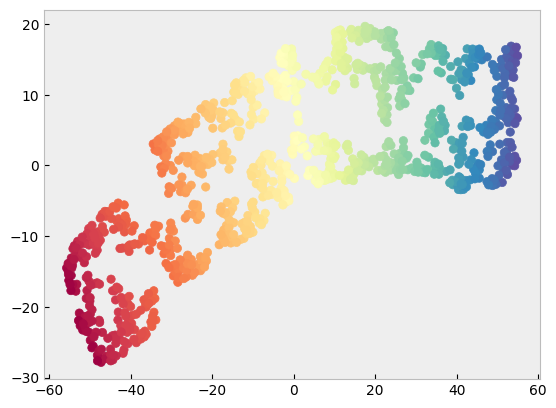

In [29]:
# S-curve manifold learning with ISOMAP

tsne = TSNE(n_components=2,learning_rate='auto', init='random')

Y = tsne.fit_transform(X_scurve)

plt.scatter(Y[:,0], Y[:,1], c=color, cmap=plt.cm.Spectral);

___

# Interpretation and Visualization Example - MNIST Dataset

In [30]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import Isomap, MDS, LocallyLinearEmbedding as LLE, TSNE
plt.rcParams['axes.grid'] = False
import warnings
warnings.filterwarnings("ignore")

In [24]:
# Loading MNIST data set
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

# Loading Training Samples
train_data = np.loadtxt("mnist_train.csv", delimiter=",")
data = train_data[:,1:]
target = train_data[:,0]

# Visualizing examples per class
plt.figure(figsize=(8,8))
grid_loc=1
for i in range(10): # for each class label
    idx_locations = np.where(target==i)[0] # identify index location where labels are equal to i
    idx = np.random.choice(range(len(idx_locations)),replace=False,size=9) # select 9 of those at random
    for j in range(9):
        plt.subplot(10,9,grid_loc) # grid labels counts left to right, top to bottom
        # reshaping randomly selected image as 28x28 and displaying it
        plt.imshow(data[idx_locations[j]].reshape((28,28)), cmap='gray')
        plt.axis('off')
        grid_loc+=1

FileNotFoundError: mnist_train.csv not found.

In [ ]:
# use only 1/40 of the data: full dataset takes a long time!

X_train = data[::40]
t_train = target[::40]

In [ ]:
#PCA
model = PCA(n_components=2)
proj_pca = model.fit_transform(X_train)

#PCA
model = LDA(n_components=2)
proj_lda = model.fit_transform(X_train, t_train)

In [ ]:
#MDS
model = MDS(n_components=2, normalized_stress='auto')
proj_mds = model.fit_transform(X_train)

In [ ]:
# IsoMap
model = Isomap(n_components=2)
proj_isomap = model.fit_transform(X_train)

In [ ]:
# LLE
model = LLE(n_components=2)
proj_lle = model.fit_transform(X_train)

In [ ]:
# t-SNE
model = TSNE(n_components=2,learning_rate='auto', init='random')
proj_tsne = model.fit_transform(X_train)

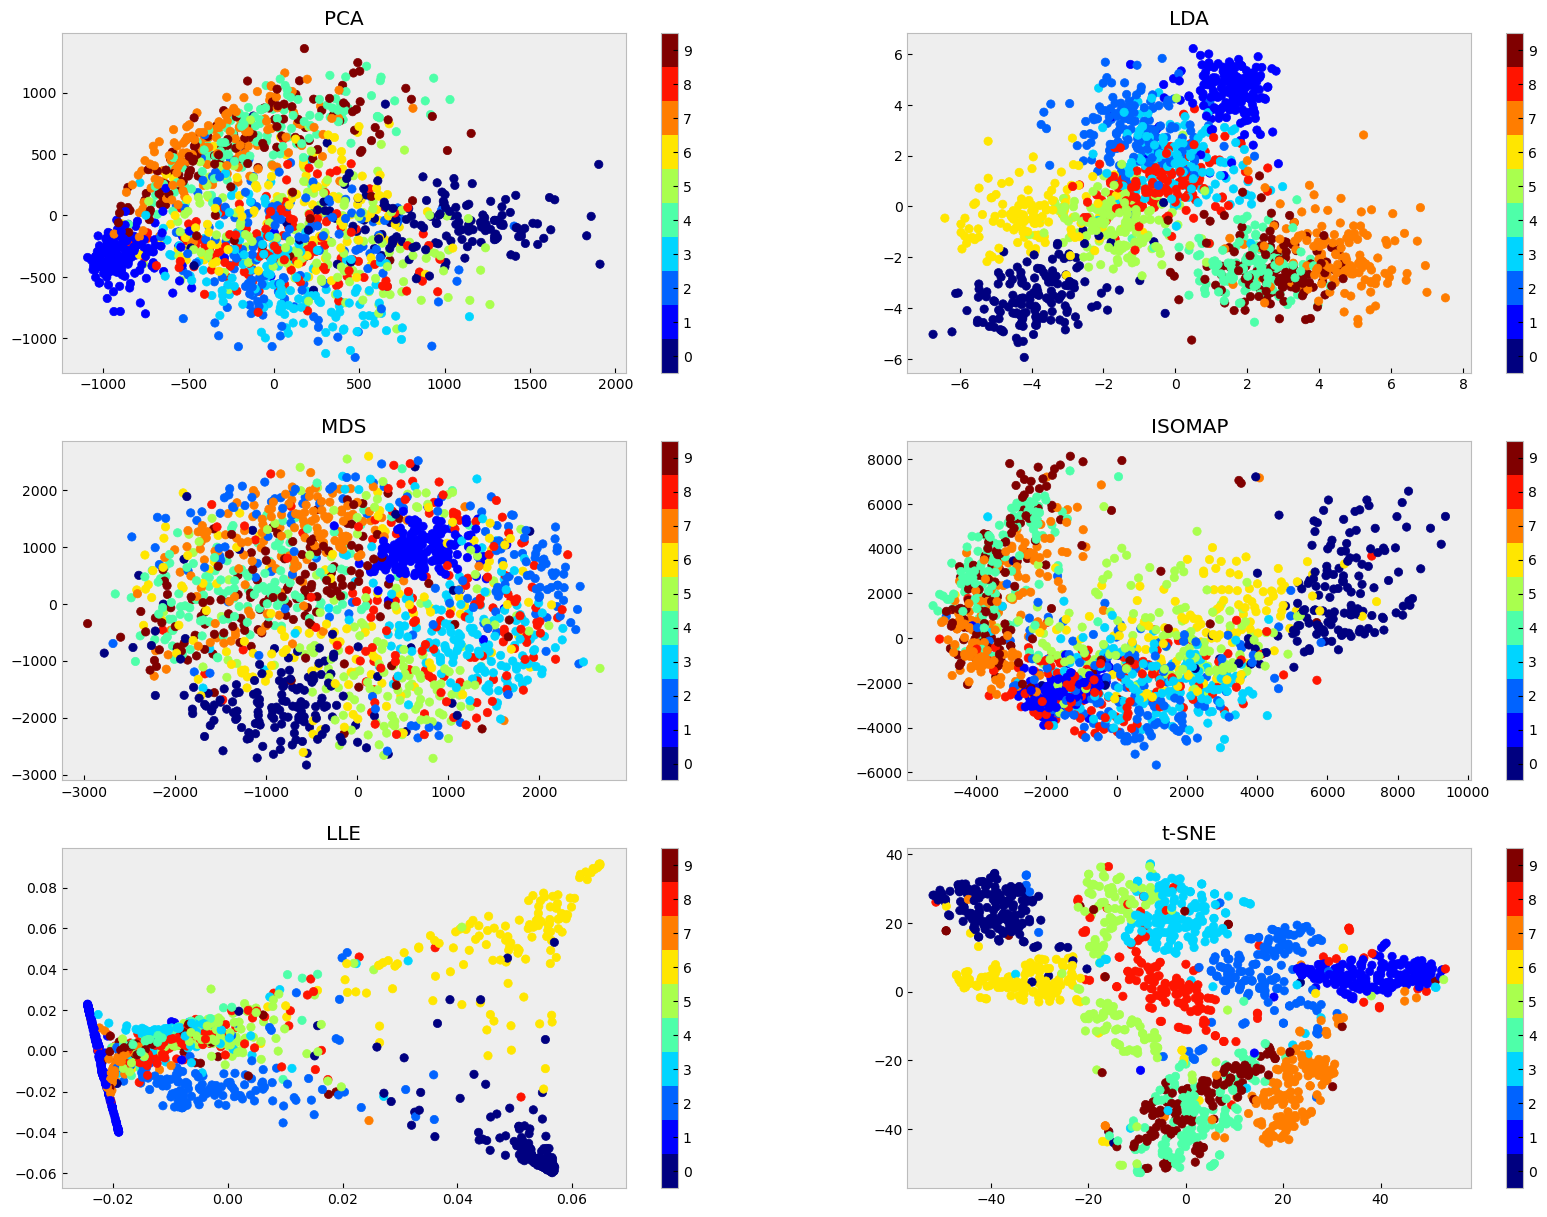

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(3,2,1)
plt.scatter(proj_pca[:, 0], proj_pca[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5); plt.title('PCA')

plt.subplot(3,2,2)
plt.scatter(proj_lda[:, 0], proj_lda[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5); plt.title('LDA')

plt.subplot(3,2,3)
plt.scatter(proj_mds[:, 0], proj_mds[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5); plt.title('MDS')

plt.subplot(3,2,4)
plt.scatter(proj_isomap[:, 0], proj_isomap[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5); plt.title('ISOMAP')

plt.subplot(3,2,5)
plt.scatter(proj_lle[:, 0], proj_lle[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5); plt.title('LLE')

plt.subplot(3,2,6)
plt.scatter(proj_tsne[:, 0], proj_tsne[:, 1], c=t_train, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5); plt.title('t-SNE');

Let's now interpret the new embedding dimensions via visualization: 

In [ ]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data, t)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

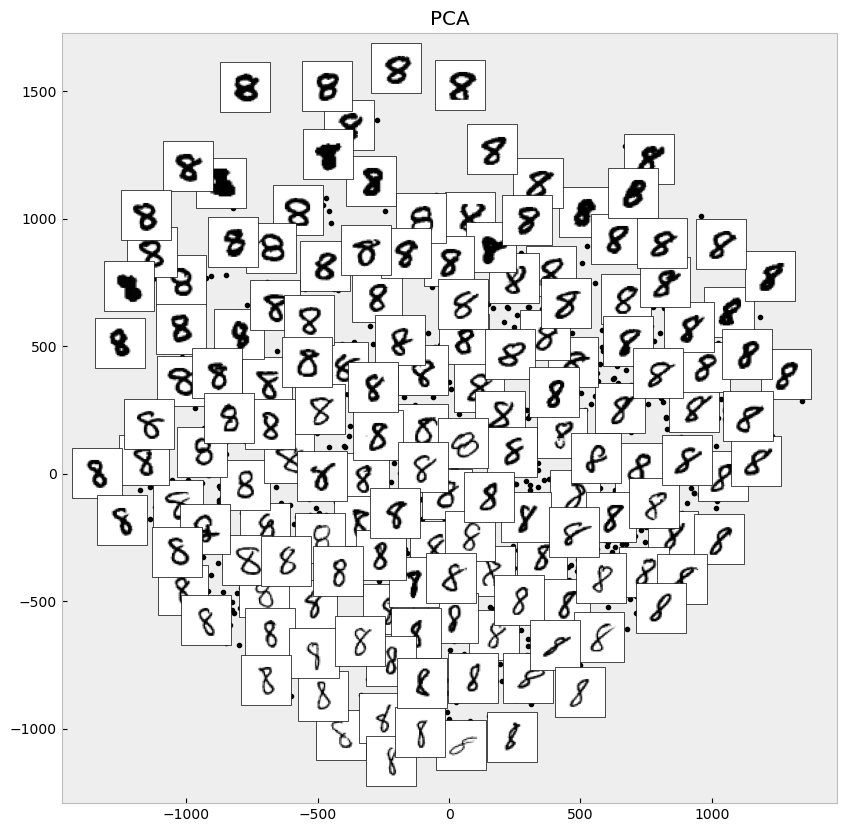

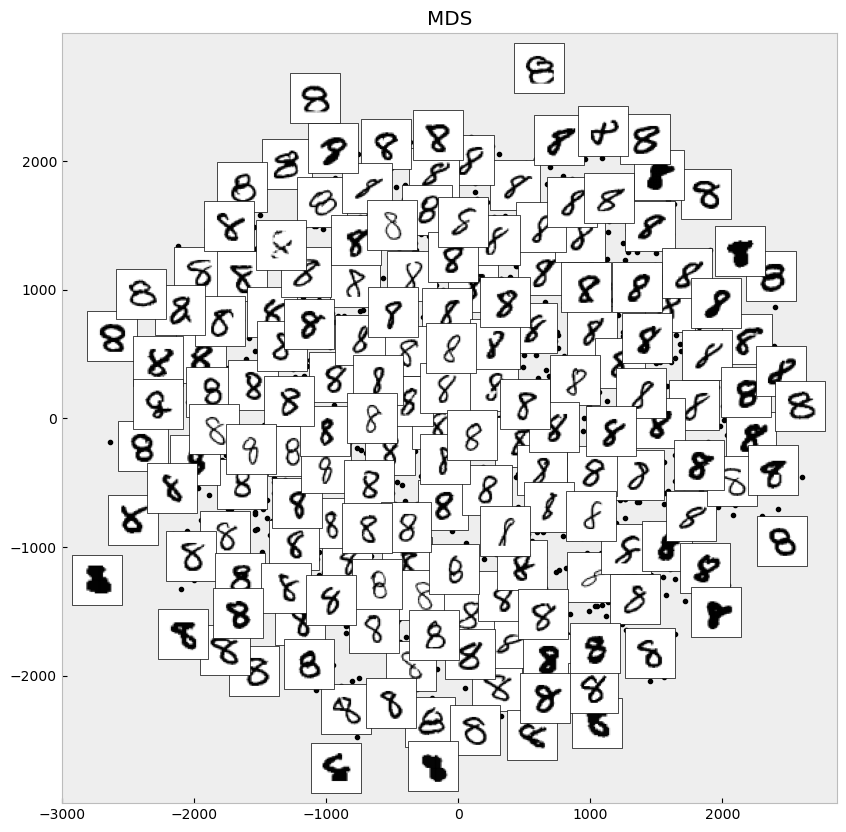

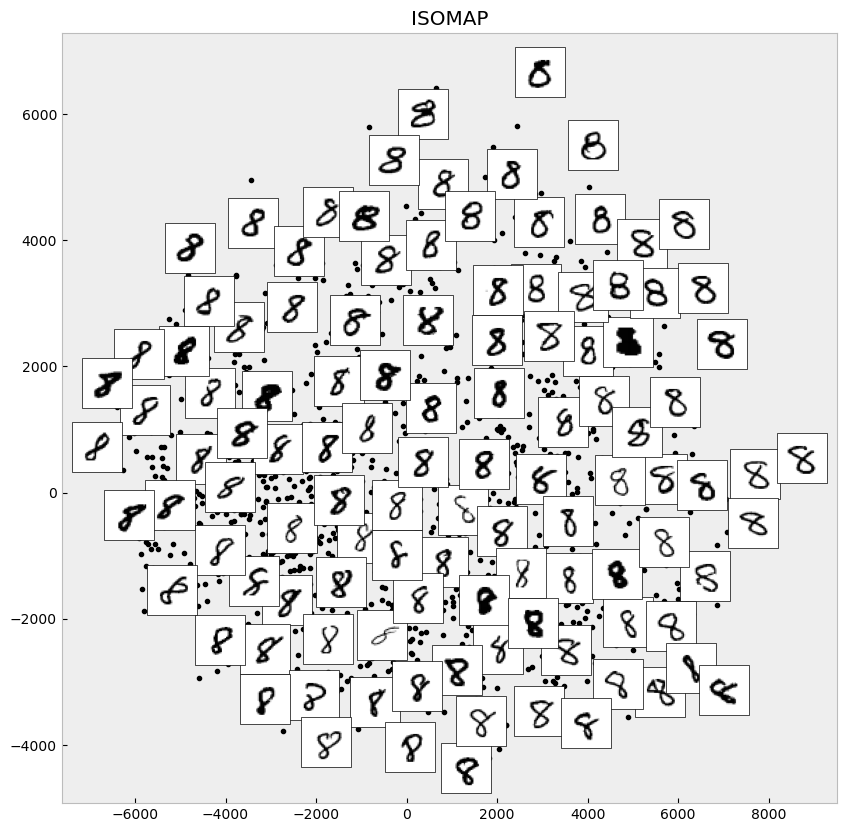

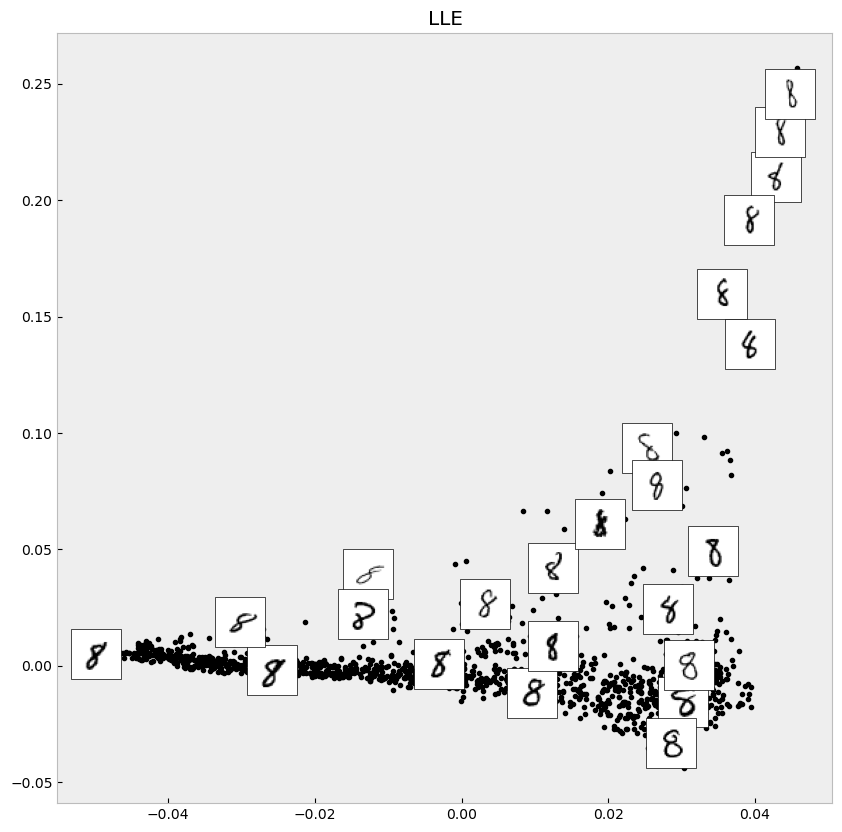

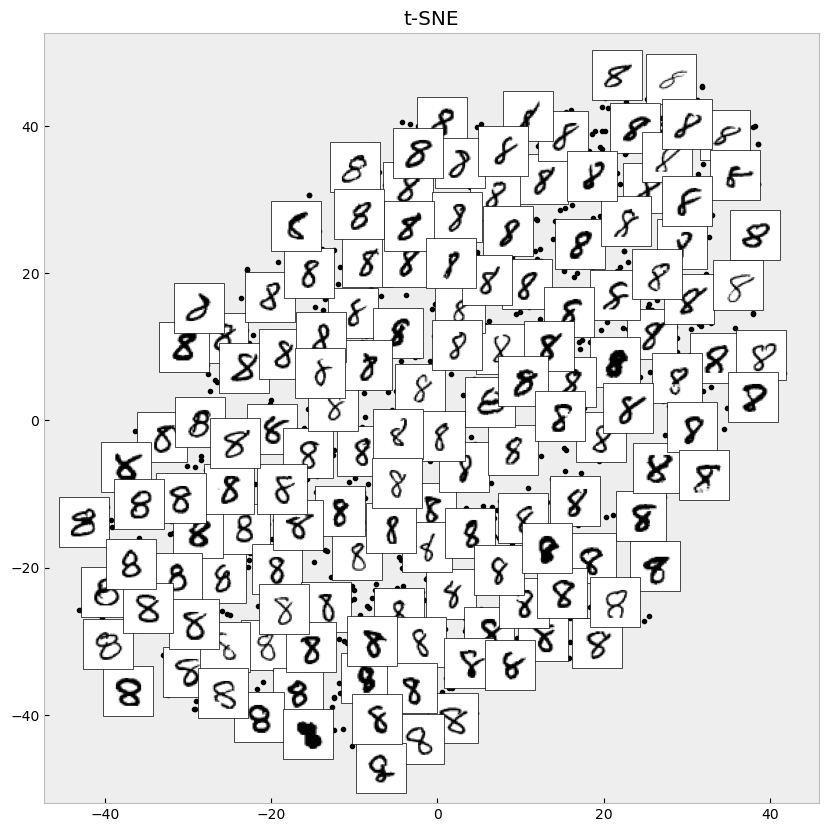

In [ ]:
# Choose 1/4 of a digit to project
X = train_data[:,1:]
t = train_data[:,0]
N,D = data.shape

# Visualizing a specific digit
digit = 8
data = X[t == digit,:][::4]

# PCA
fig, ax = plt.subplots(figsize=(10, 10))
model = PCA(n_components=2)
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('PCA')

# MDS
fig, ax = plt.subplots(figsize=(10, 10))
model2 = MDS(n_components=2, max_iter=100, n_init=1)
plot_components(data, model2, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('MDS')

# ISOMAP
fig, ax = plt.subplots(figsize=(10, 10))
model3 = Isomap(n_components=2)
plot_components(data, model3, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('ISOMAP');

# LLE
fig, ax = plt.subplots(figsize=(10, 10))
model3 = LLE(n_components=2, n_neighbors=5)
plot_components(data, model3, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('LLE')

# t-SNE
fig, ax = plt.subplots(figsize=(10, 10))
model3 = TSNE(n_components=2,learning_rate='auto', init='random')
plot_components(data, model3, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')
plt.title('t-SNE');

---